In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import os
import json

import tensorflow as tf
tf.config.run_functions_eagerly(True)

!nvidia-smi

Mon Mar 15 01:08:40 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    34W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
project_dir="/content/drive/MyDrive/comp598-II/project"

src_dir=os.path.join(project_dir,"src")
datadir=os.path.join(project_dir,"data/")
npy_dir=os.path.join(project_dir,"data/npy")

results_dir=os.path.join(project_dir,"notebooks/DANN-WISDM/stage1/results")

import sys
sys.path.append(src_dir)

import dann_v1 as dann

In [3]:
seen_subj = list(range(1600,1605))
unseen_subj=1610



In [4]:
summary={}

alpha=0.75
batchsize=32
EPOCHS=90
indomain_epoch=20
cv=5

clf_lr= 1e-4
disc_lr=1e-4
ext_lr= 1e-4

act_subset=['Walking',
            'Clapping',
            'Drinking from Cup',
            'Jogging',
            'Brushing Teeth',
            'Typing',
            'Writing',
            'Stairs']

seen_device, unseen_device = "watch", "watch"
seen_sensor, unseen_sensor = "accel", "accel"


with open(os.path.join(datadir,"act_to_int.json"),"r") as jpath:
  act_int_lookup=json.load(jpath)

int_act_lookup={act_int_lookup[key]:key for key in act_int_lookup}

(seen_x,seen_y),(unseen_x,unseen_y),num_class, remapping_dict = dann.load_subjects(npy_dir,
                                                                   seen_subj,
                                                                   seen_device,
                                                                   seen_sensor,
                                                                   unseen_subj,
                                                                   unseen_device,
                                                                   unseen_sensor,
                                                                   act_int_lookup,
                                                                   act_subset)

remapped_int_act_lookup={remapping_dict[key]:int_act_lookup[int(remapping_dict[key])] for key in remapping_dict}
print(remapped_int_act_lookup)

print(seen_x.shape,seen_y.shape)
print(unseen_x.shape,unseen_y.shape)

{0: 'Walking', 1: 'Jogging', 2: 'Stairs', 3: 'Sitting', 4: 'Standing', 5: 'Typing', 6: 'Brushing Teeth', 7: 'Eating Soup'}
(2840, 100, 3) (2840,)
(568, 100, 3) (568,)


In [5]:
summary['alpha']=alpha
summary['batchsize']=batchsize
summary['cross epoch']=EPOCHS
summary['indomain epoch']=indomain_epoch

summary['clf lr']=clf_lr
summary['disc lr']=disc_lr
summary['ext lr']=ext_lr
summary['act']=act_subset

summary['source subj']=seen_subj
summary['source device']=seen_device
summary['source sensor']=seen_sensor

summary['target subj']=unseen_subj
summary['target device']=unseen_device
summary['target sensor']=unseen_sensor

epoch 1/90
18/18 [==============================] - 6s 114ms/batch - classifier acc: 0.4852 - classifier loss: 1.3483 - domain acc: 0.4871 - domain_loss: 0.5524
epoch 2/90
18/18 [==============================] - 1s 75ms/batch - classifier acc: 0.6020 - classifier loss: 0.9774 - domain acc: 0.5398 - domain_loss: 0.5216
epoch 3/90
18/18 [==============================] - 1s 75ms/batch - classifier acc: 0.6908 - classifier loss: 0.6896 - domain acc: 0.5142 - domain_loss: 0.5506
epoch 4/90
18/18 [==============================] - 1s 74ms/batch - classifier acc: 0.7072 - classifier loss: 0.6591 - domain acc: 0.5256 - domain_loss: 0.5897
epoch 5/90
18/18 [==============================] - 1s 75ms/batch - classifier acc: 0.7155 - classifier loss: 0.6381 - domain acc: 0.5560 - domain_loss: 0.5406
epoch 6/90
18/18 [==============================] - 1s 75ms/batch - classifier acc: 0.7434 - classifier loss: 0.5227 - domain acc: 0.5636 - domain_loss: 0.5201
epoch 7/90
18/18 [=====================

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


============================ cv 1/5 ==========================
0.9996478873239436
0.9225352112676056
0.46694053208137715
epoch 1/90
18/18 [==============================] - 2s 77ms/batch - classifier acc: 0.3964 - classifier loss: 1.5360 - domain acc: 0.4609 - domain_loss: 0.5820
epoch 2/90
18/18 [==============================] - 1s 73ms/batch - classifier acc: 0.5806 - classifier loss: 0.9629 - domain acc: 0.4915 - domain_loss: 0.5708
epoch 3/90
18/18 [==============================] - 1s 73ms/batch - classifier acc: 0.6678 - classifier loss: 0.7426 - domain acc: 0.5209 - domain_loss: 0.5414
epoch 4/90
18/18 [==============================] - 1s 73ms/batch - classifier acc: 0.7714 - classifier loss: 0.5305 - domain acc: 0.5524 - domain_loss: 0.5081
epoch 5/90
18/18 [==============================] - 1s 73ms/batch - classifier acc: 0.7484 - classifier loss: 0.5471 - domain acc: 0.5401 - domain_loss: 0.5281
epoch 6/90
18/18 [==============================] - 1s 73ms/batch - classifier 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


============================ cv 2/5 ==========================
0.9985915492957746
0.9436619718309859
0.5960485133020345
epoch 1/90
18/18 [==============================] - 2s 78ms/batch - classifier acc: 0.4704 - classifier loss: 1.3442 - domain acc: 0.4726 - domain_loss: 0.5650
epoch 2/90
18/18 [==============================] - 1s 73ms/batch - classifier acc: 0.6299 - classifier loss: 0.8863 - domain acc: 0.5335 - domain_loss: 0.5426
epoch 3/90
18/18 [==============================] - 1s 73ms/batch - classifier acc: 0.7812 - classifier loss: 0.5458 - domain acc: 0.5141 - domain_loss: 0.5608
epoch 4/90
18/18 [==============================] - 1s 74ms/batch - classifier acc: 0.7319 - classifier loss: 0.5194 - domain acc: 0.5067 - domain_loss: 0.5650
epoch 5/90
18/18 [==============================] - 1s 73ms/batch - classifier acc: 0.6990 - classifier loss: 0.6683 - domain acc: 0.5108 - domain_loss: 0.5411
epoch 6/90
18/18 [==============================] - 1s 73ms/batch - classifier a

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


============================ cv 3/5 ==========================
0.9985915492957746
0.9366197183098591
0.6384976525821596
epoch 1/90
18/18 [==============================] - 2s 78ms/batch - classifier acc: 0.4457 - classifier loss: 1.4427 - domain acc: 0.5019 - domain_loss: 0.5483
epoch 2/90
18/18 [==============================] - 1s 74ms/batch - classifier acc: 0.6135 - classifier loss: 0.8923 - domain acc: 0.5341 - domain_loss: 0.5572
epoch 3/90
18/18 [==============================] - 1s 74ms/batch - classifier acc: 0.6464 - classifier loss: 0.8137 - domain acc: 0.5291 - domain_loss: 0.5352
epoch 4/90
18/18 [==============================] - 1s 74ms/batch - classifier acc: 0.7270 - classifier loss: 0.6000 - domain acc: 0.5211 - domain_loss: 0.5570
epoch 5/90
18/18 [==============================] - 1s 74ms/batch - classifier acc: 0.7270 - classifier loss: 0.5567 - domain acc: 0.5335 - domain_loss: 0.5186
epoch 6/90
18/18 [==============================] - 1s 73ms/batch - classifier a

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


============================ cv 4/5 ==========================
0.9943661971830986
0.9049295774647887
0.517018779342723
epoch 1/90
18/18 [==============================] - 2s 76ms/batch - classifier acc: 0.3684 - classifier loss: 1.6721 - domain acc: 0.4878 - domain_loss: 0.5430
epoch 2/90
18/18 [==============================] - 1s 74ms/batch - classifier acc: 0.5477 - classifier loss: 1.0172 - domain acc: 0.5254 - domain_loss: 0.5383
epoch 3/90
18/18 [==============================] - 1s 73ms/batch - classifier acc: 0.6234 - classifier loss: 0.8074 - domain acc: 0.5008 - domain_loss: 0.5567
epoch 4/90
18/18 [==============================] - 1s 73ms/batch - classifier acc: 0.7072 - classifier loss: 0.5912 - domain acc: 0.4922 - domain_loss: 0.5733
epoch 5/90
18/18 [==============================] - 1s 73ms/batch - classifier acc: 0.7878 - classifier loss: 0.5001 - domain acc: 0.5659 - domain_loss: 0.5115
epoch 6/90
18/18 [==============================] - 1s 73ms/batch - classifier ac

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


============================ cv 5/5 ==========================
0.9947183098591549
0.897887323943662
0.7007042253521126


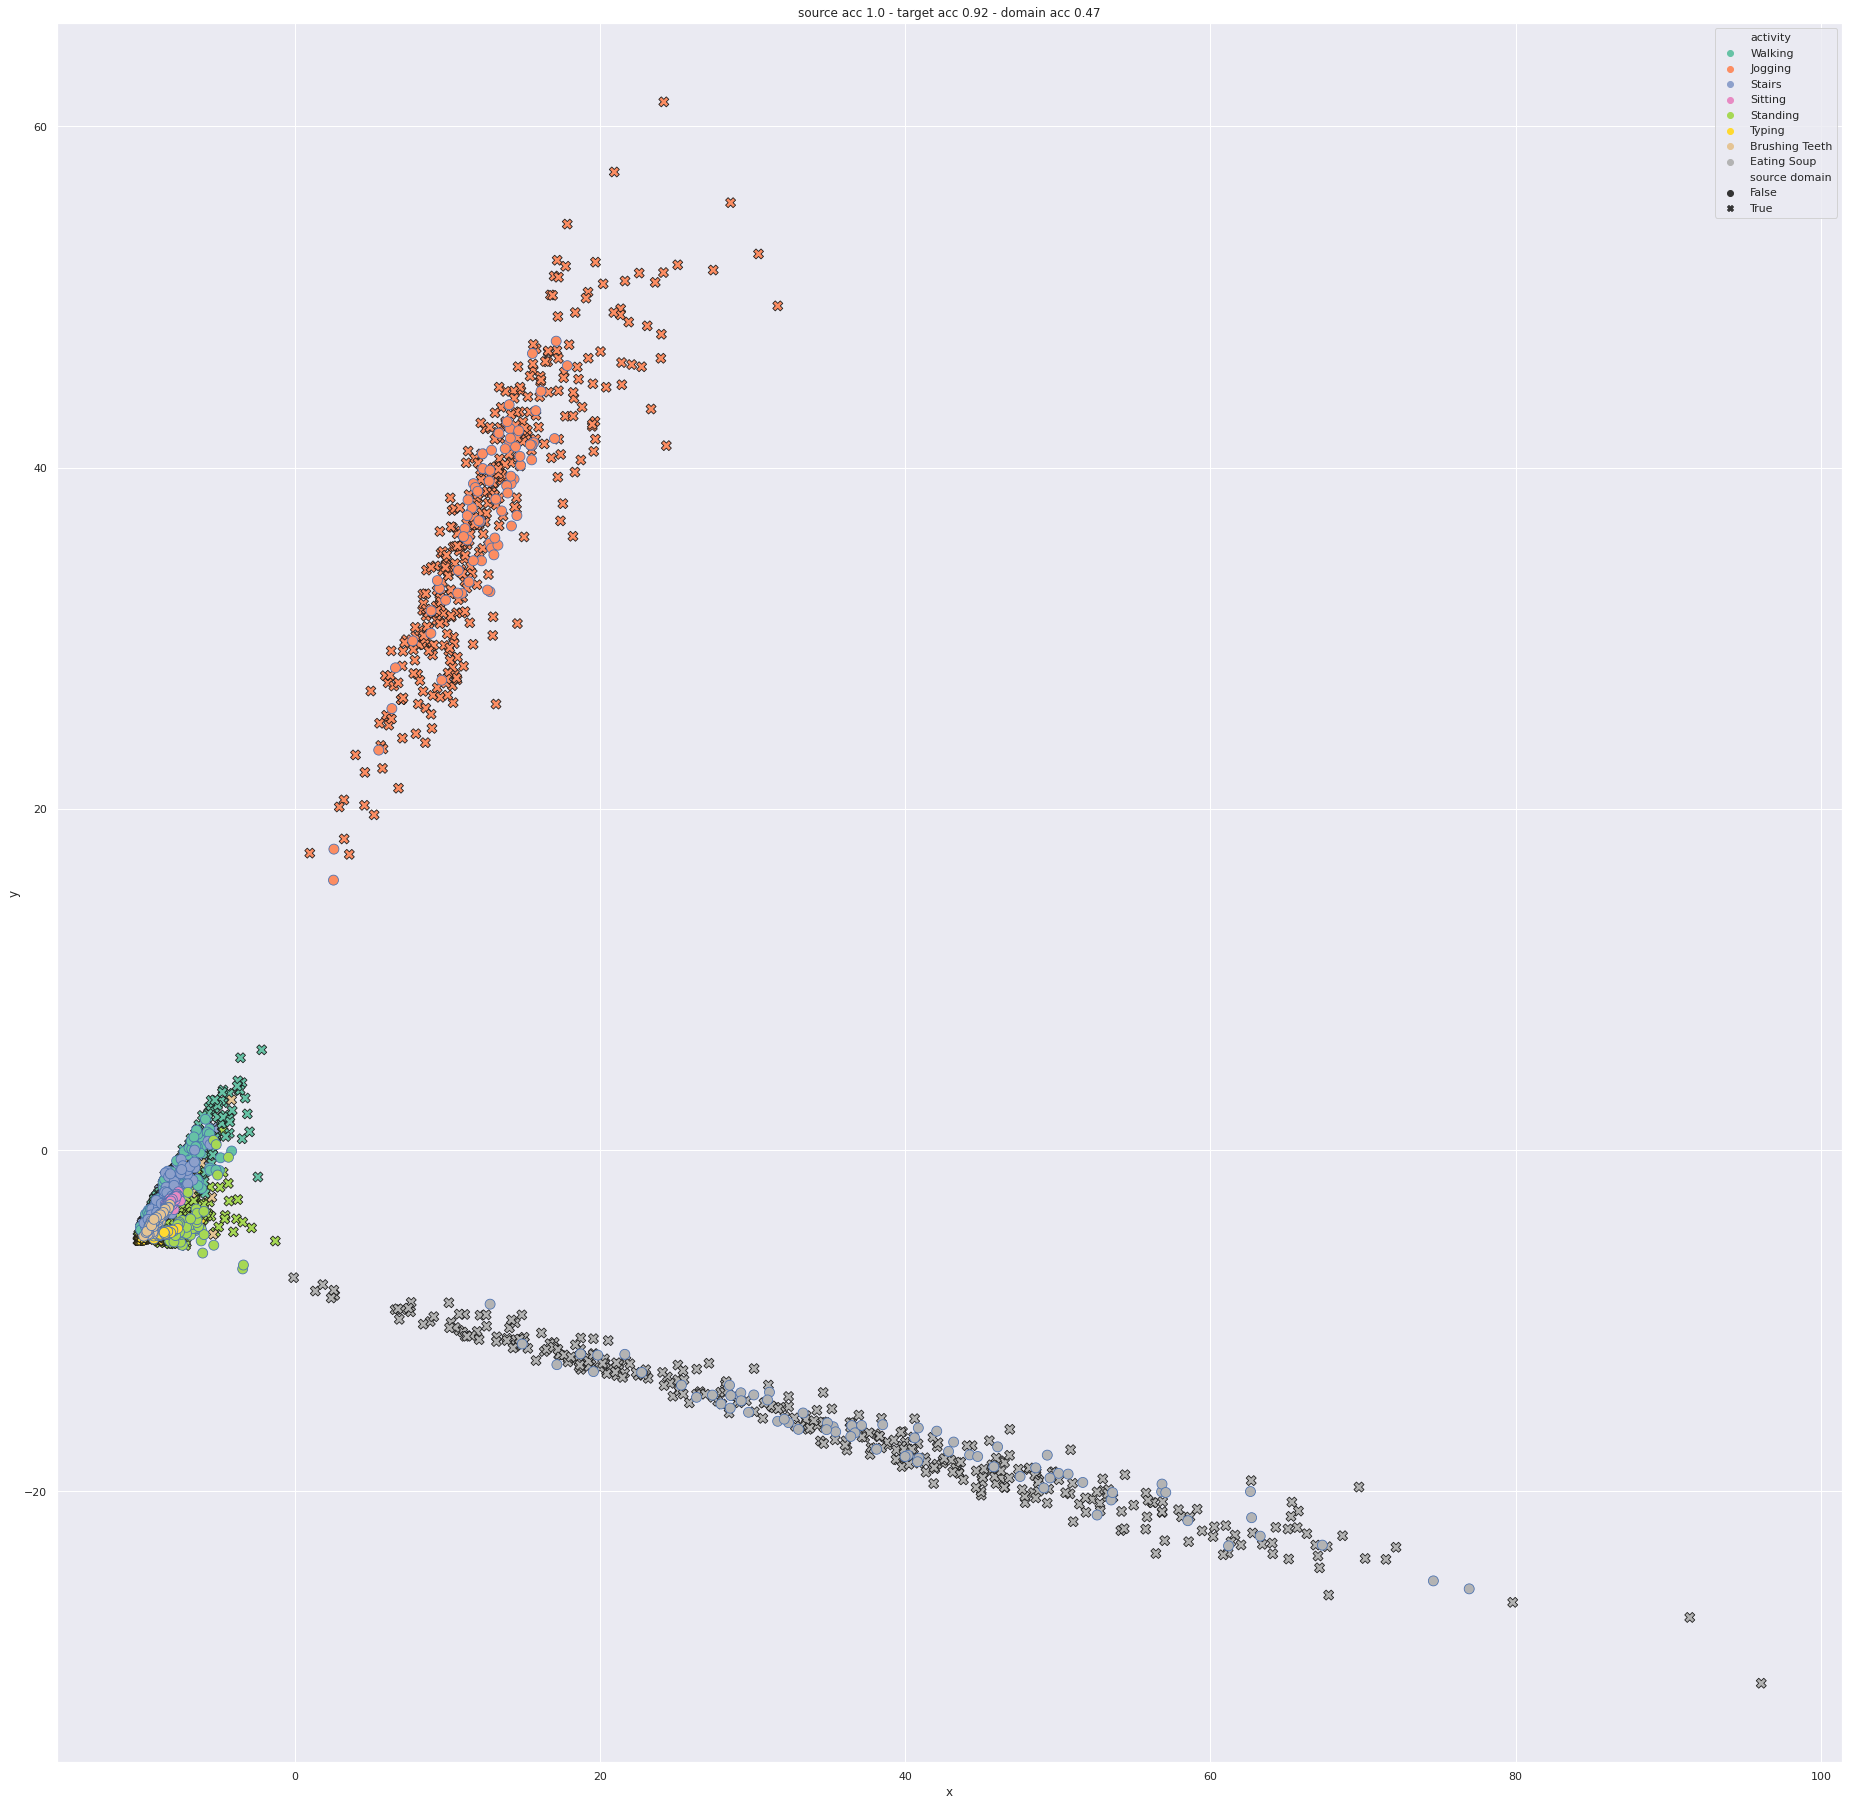

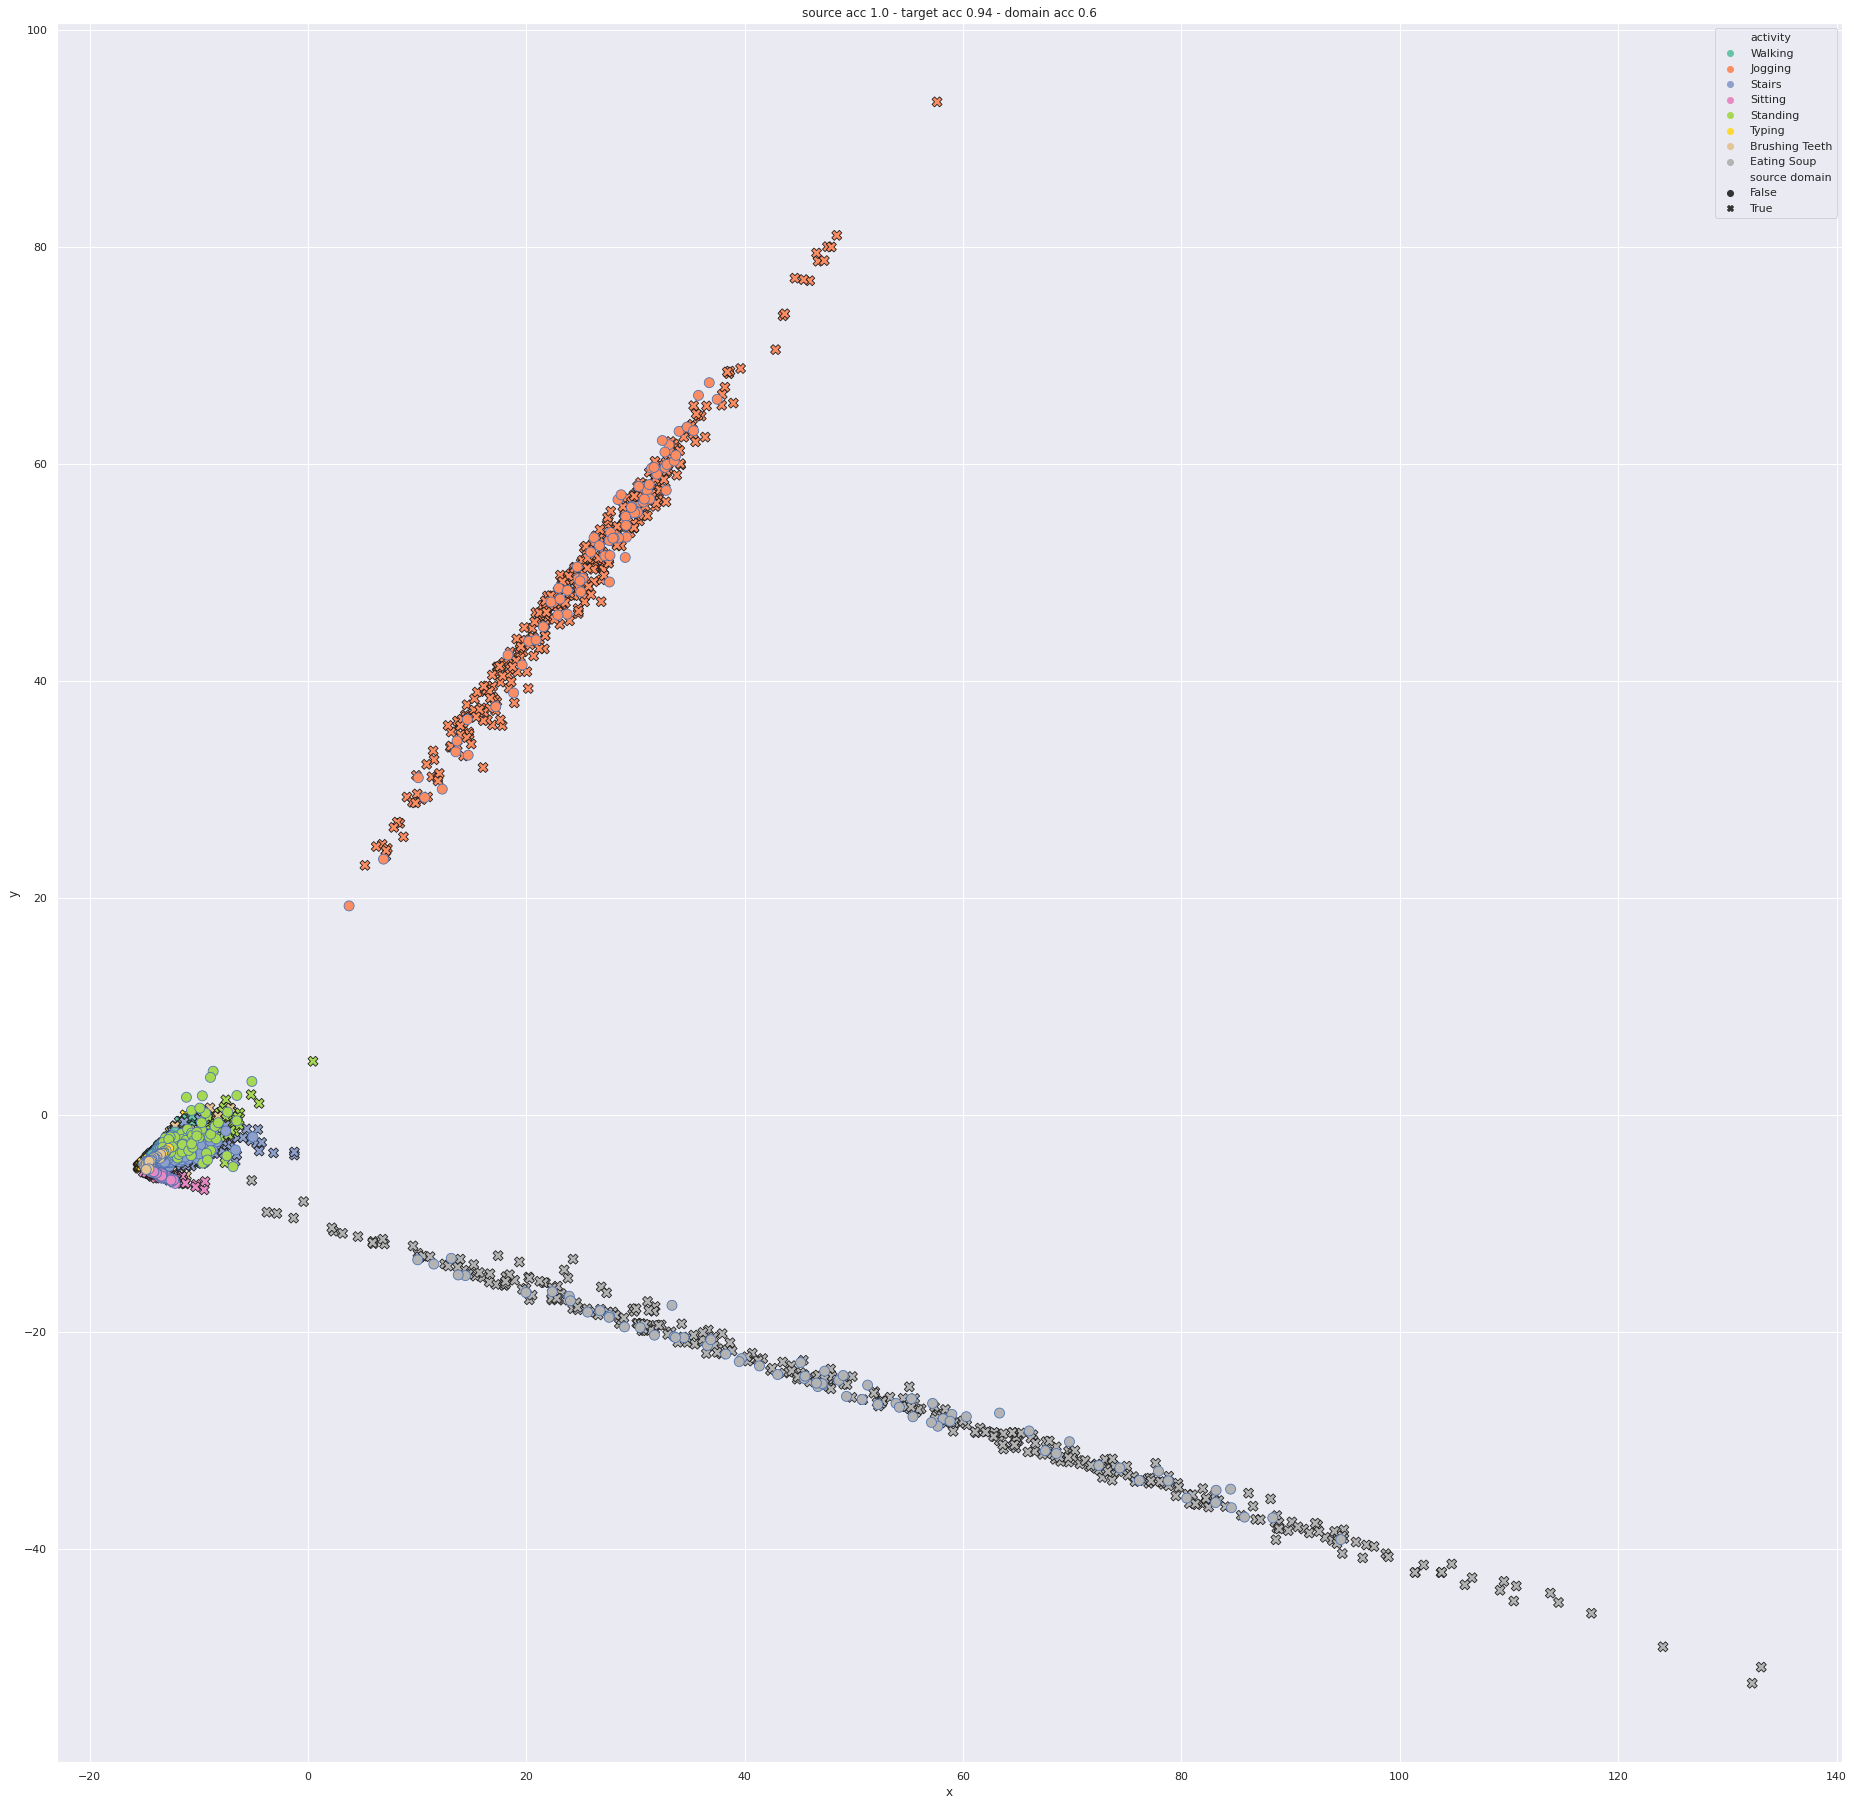

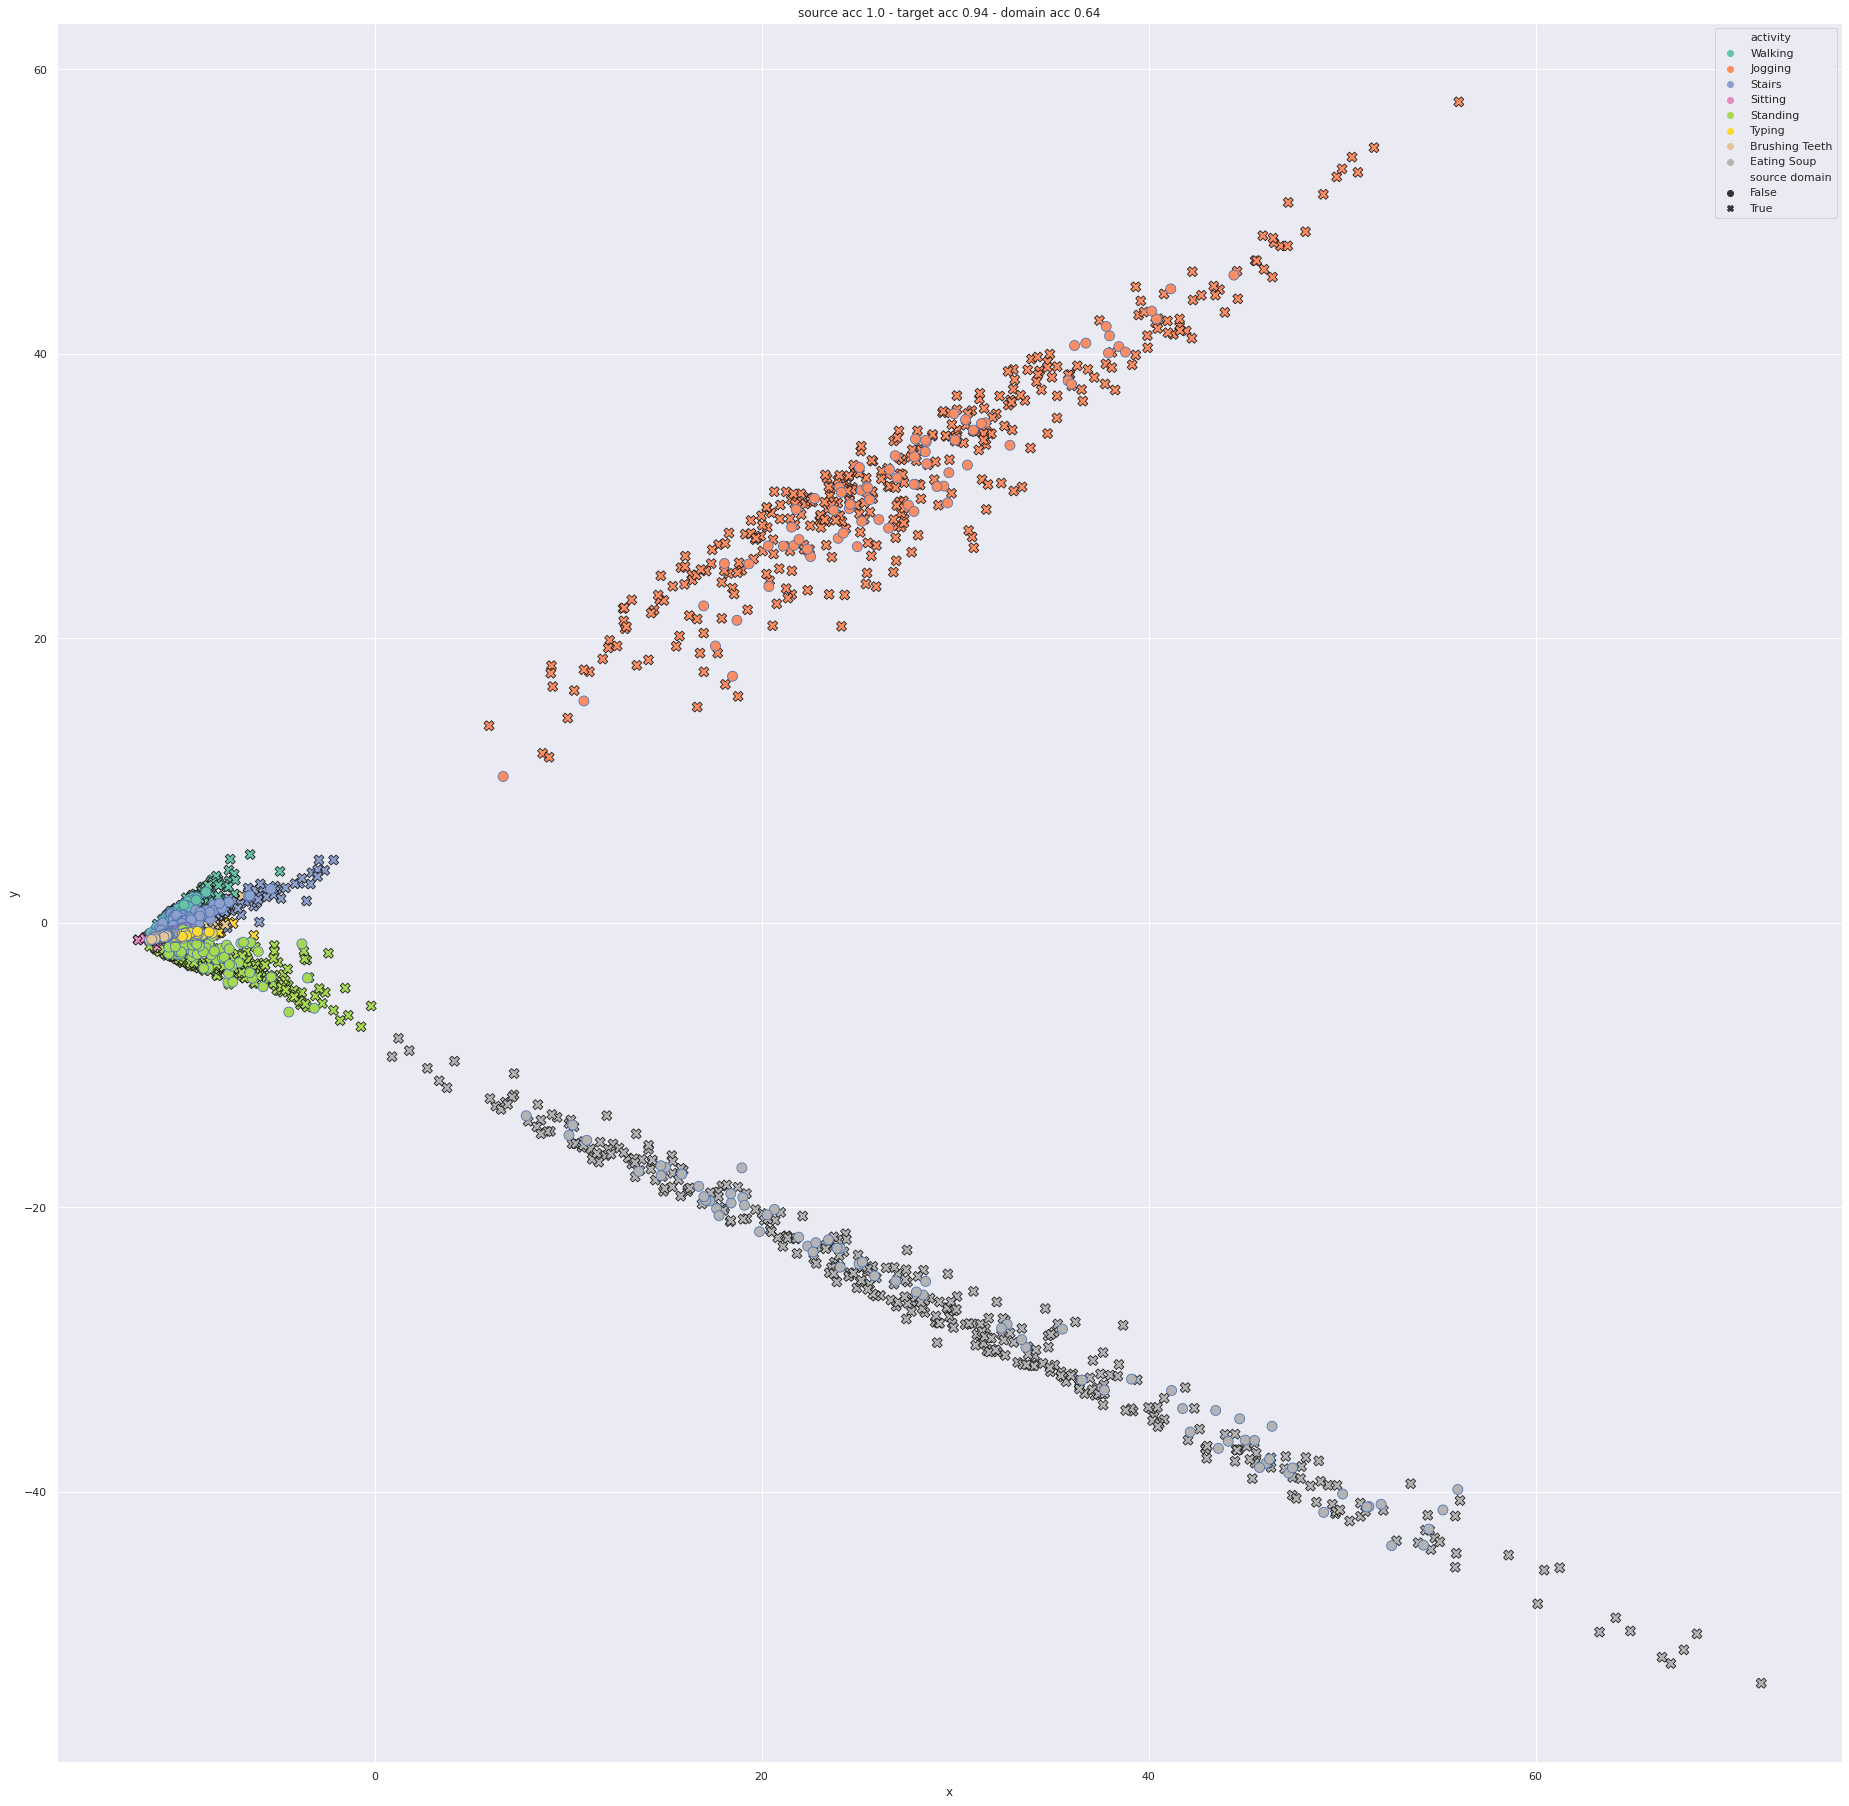

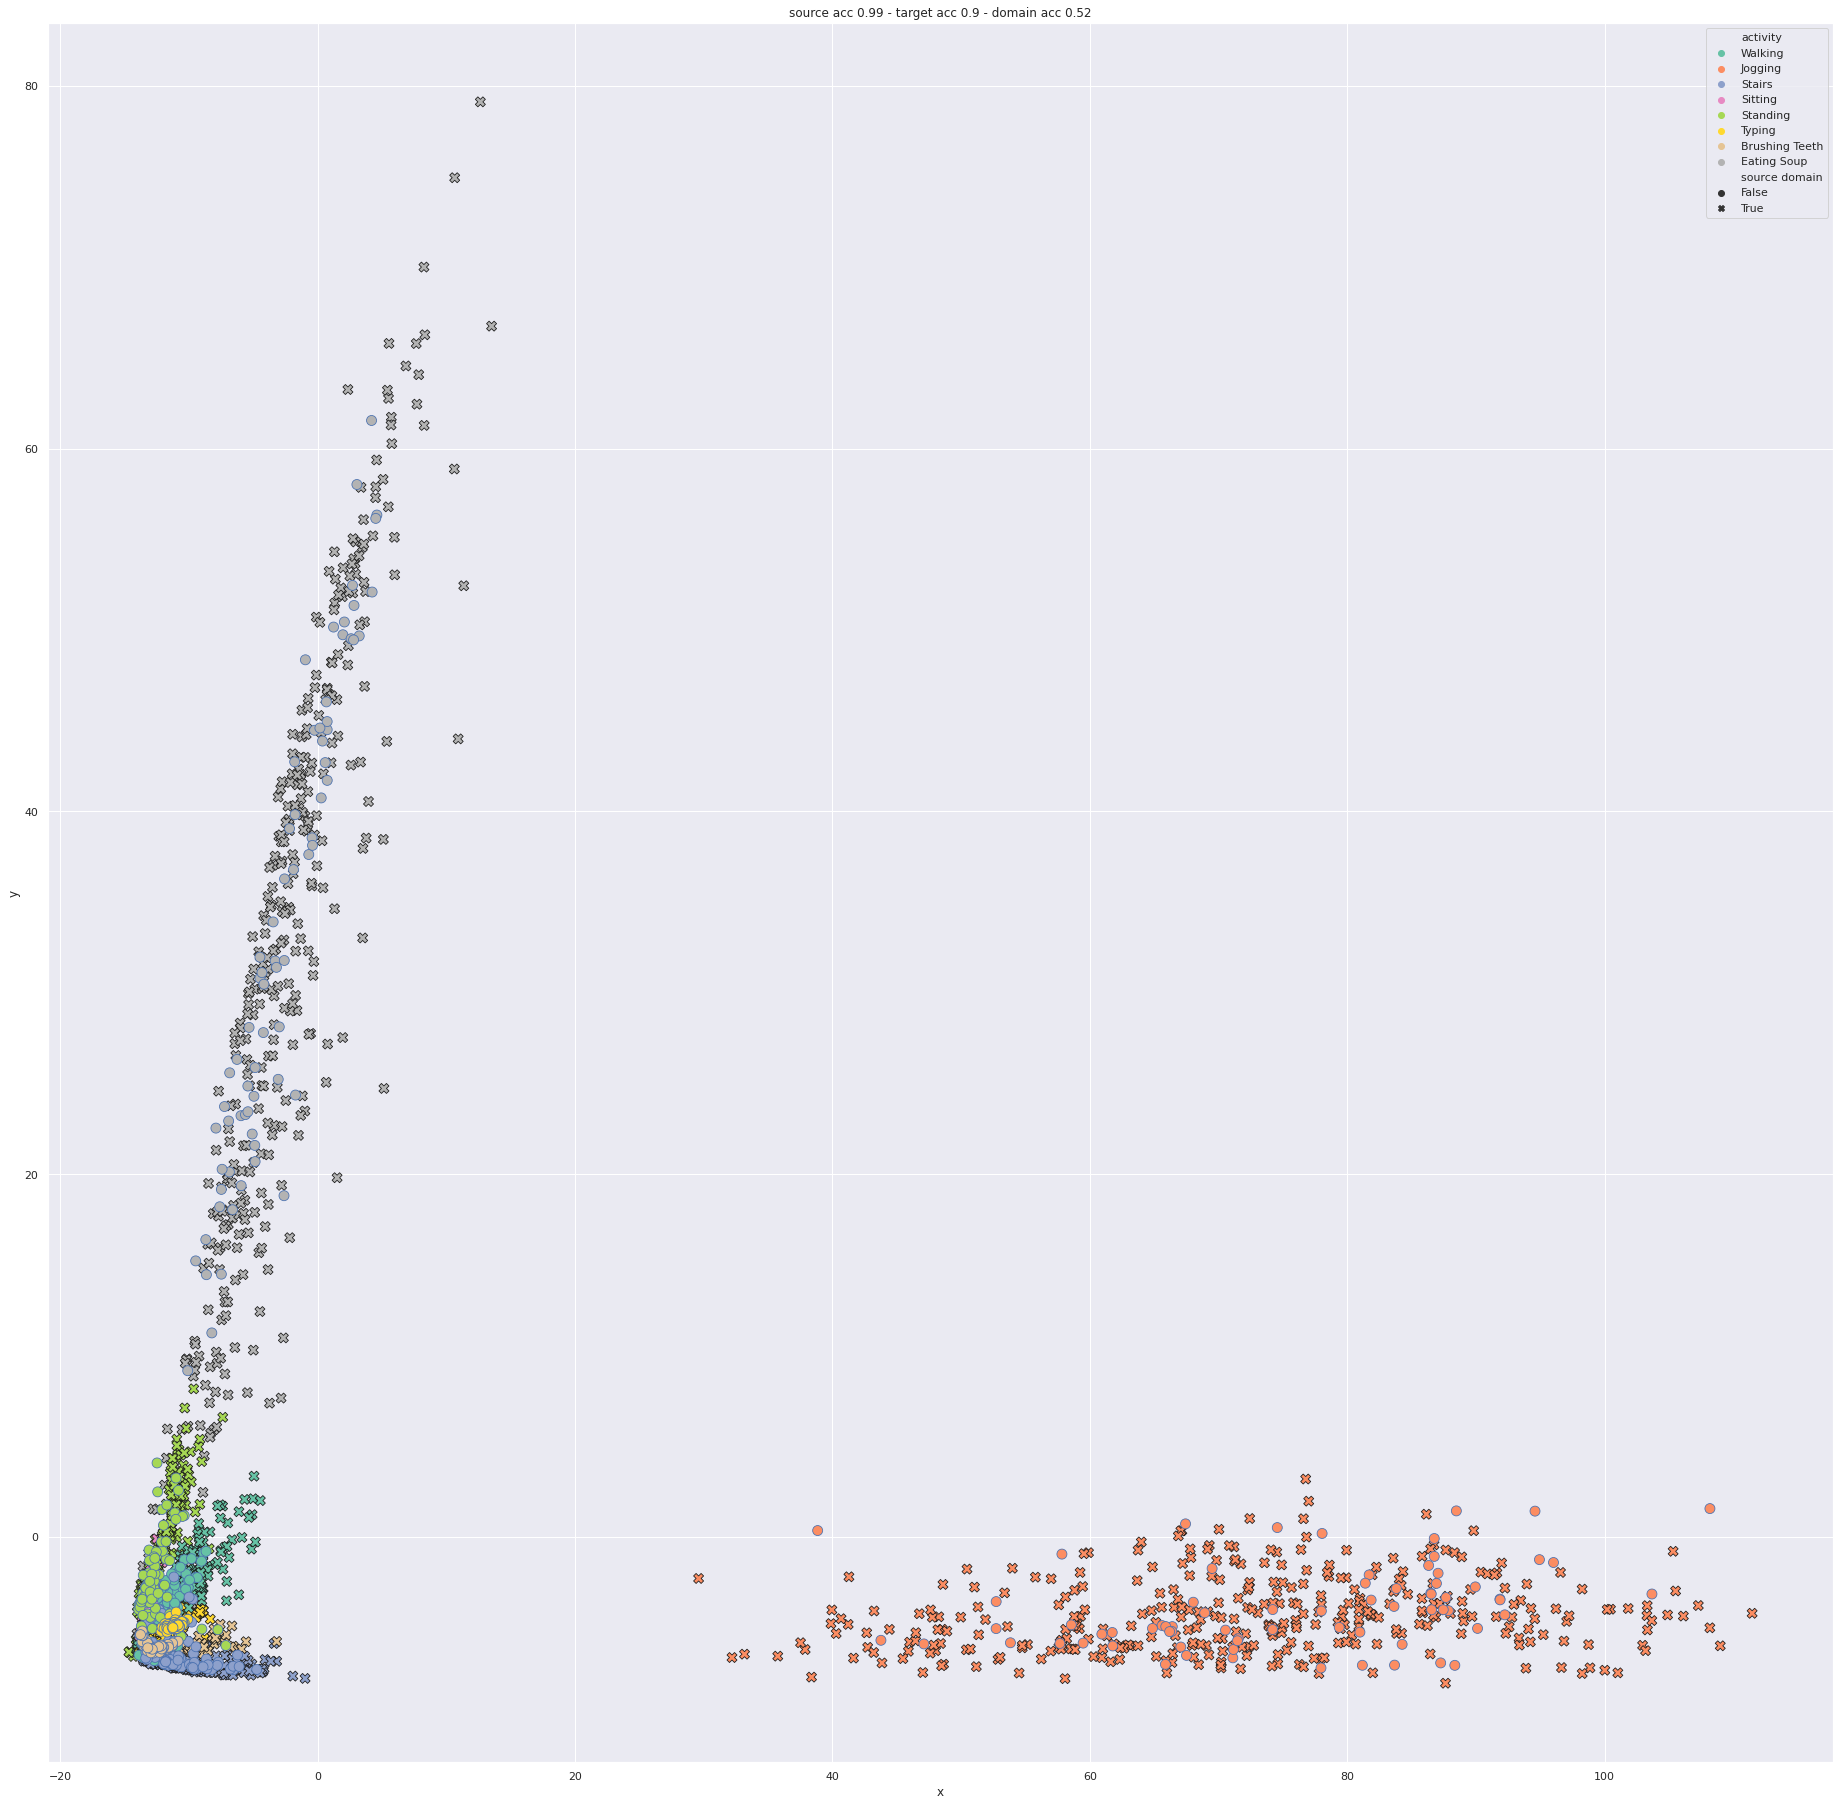

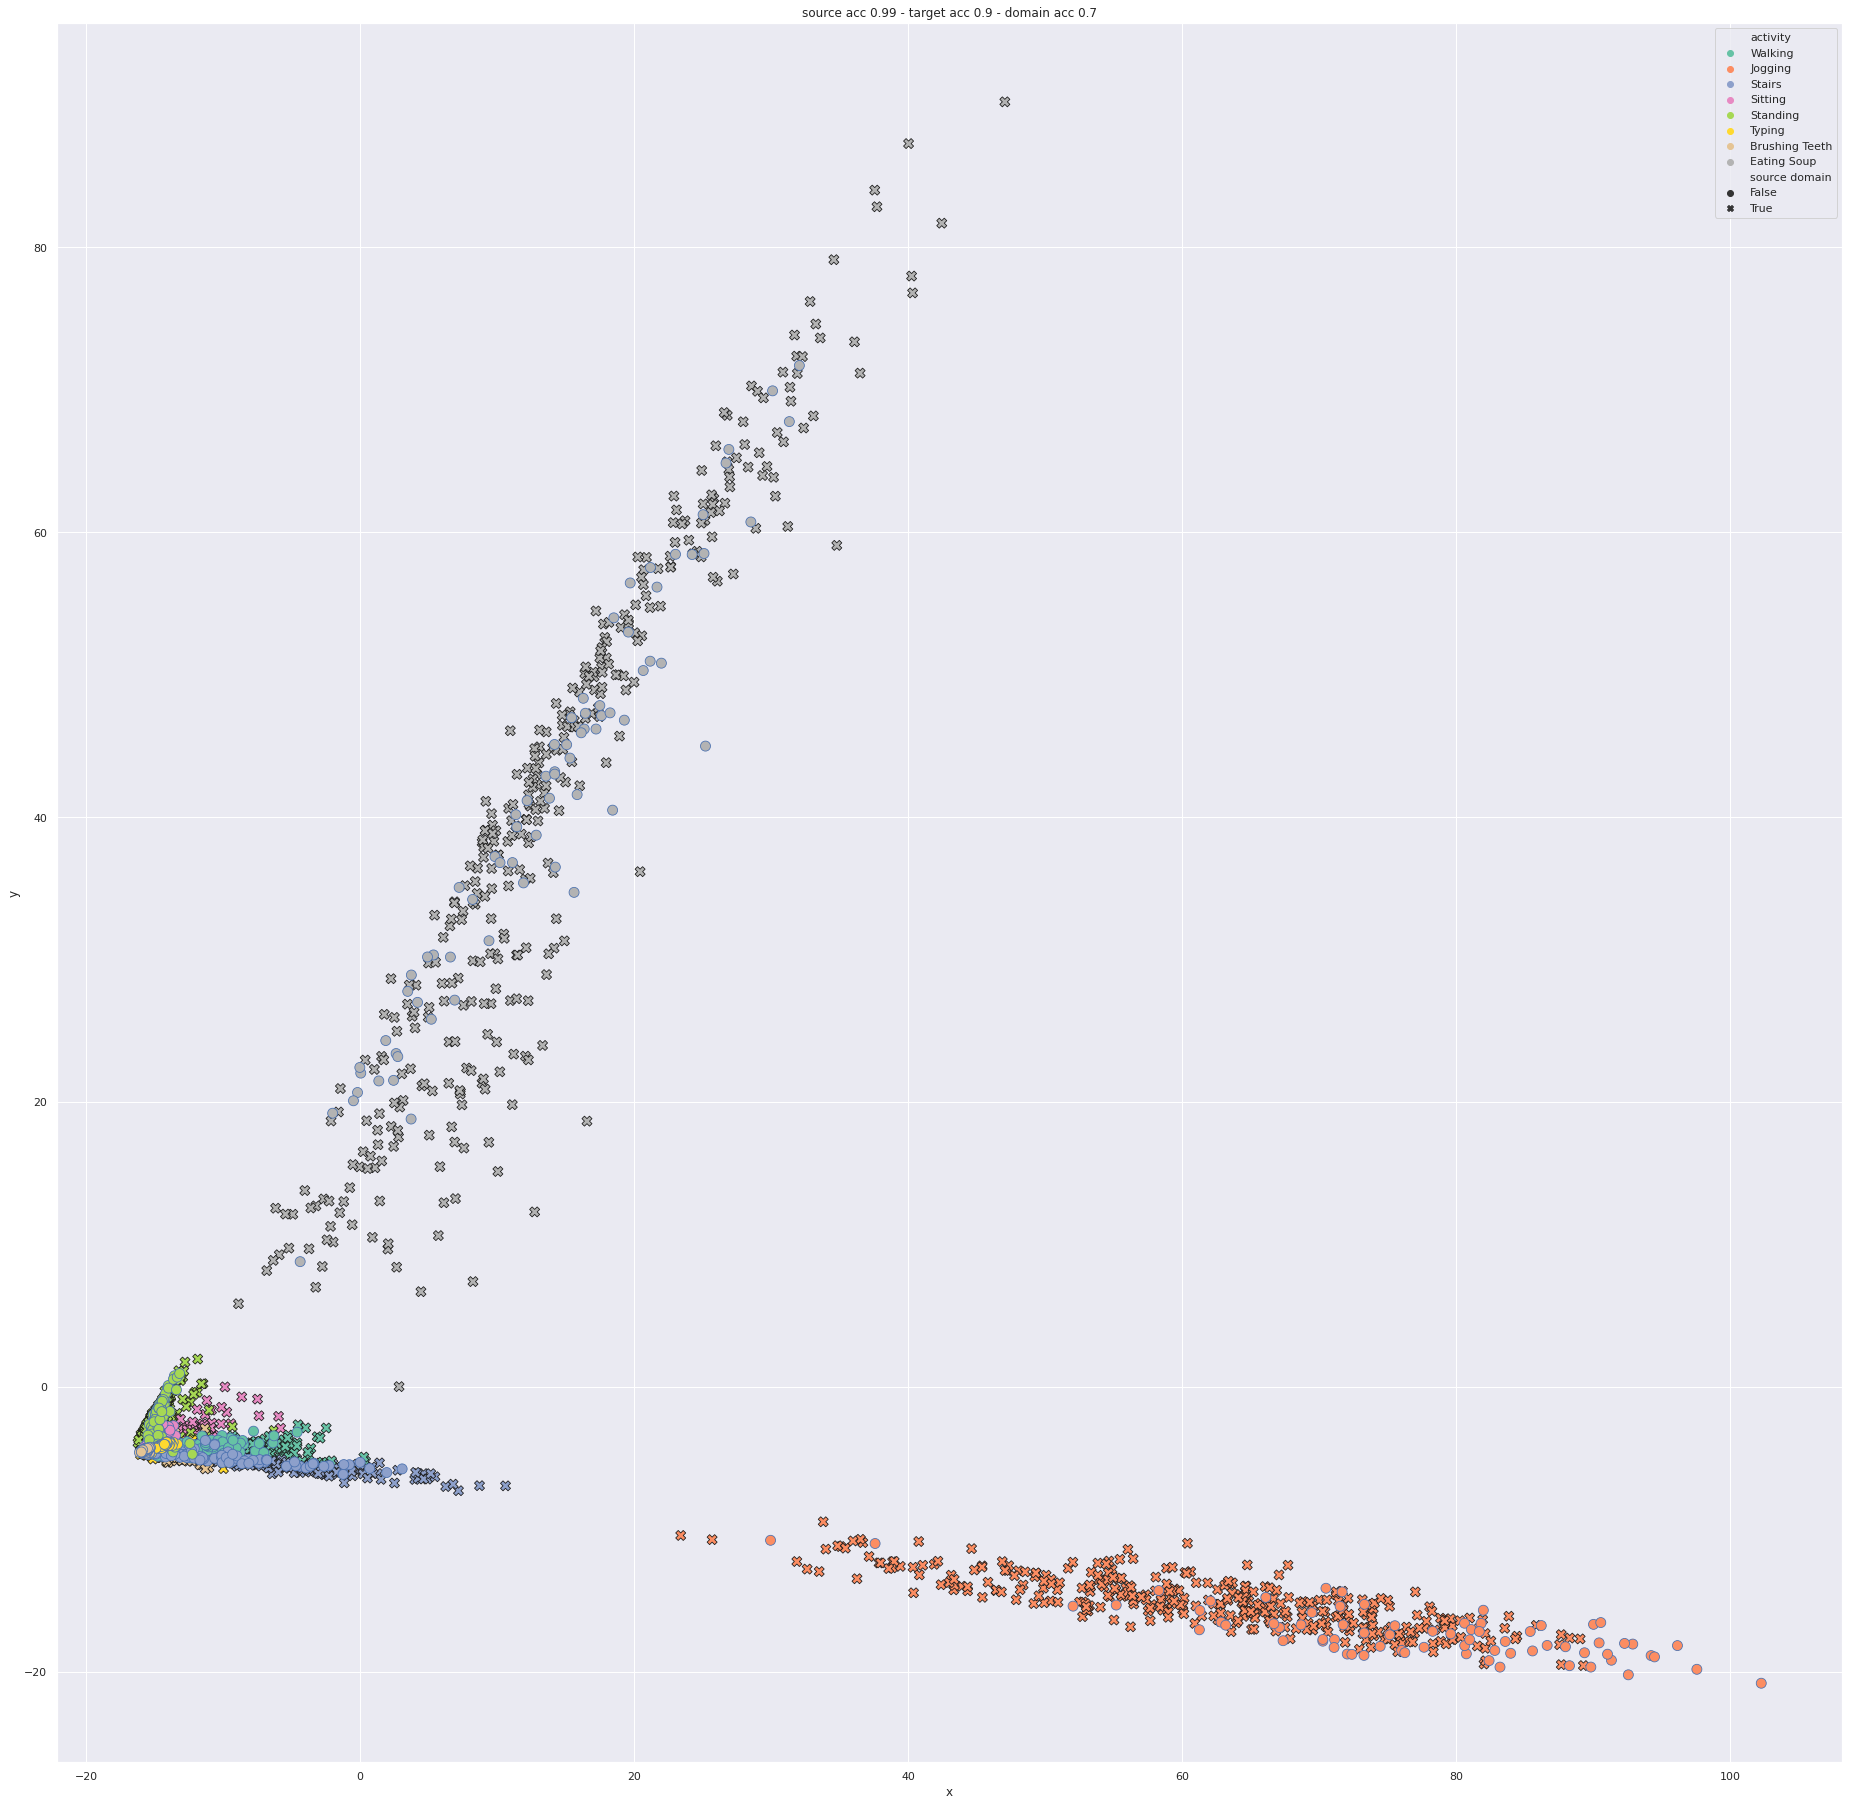

In [6]:
crossdomain_source_acc=[]
crossdomain_target_acc=[]

domain_label_acc=[]

for c in range(cv):
  tf.keras.backend.clear_session()
  crossdomain_model=dann.DANN(alpha=alpha,
                              epochs=EPOCHS,
                              batchsize=batchsize,
                              classifier_lr=clf_lr,
                              extractor_lr=ext_lr,
                              discriminator_lr=disc_lr)

  submodels=dann.submodel_config_march_15(num_class)
  crossdomain_model.set_submodels(submodels)

  crossdomain_model.cross_domain_train(seen_x,seen_y,unseen_x)

  source_acc=crossdomain_model.evaluate_classifier_acc(seen_x,seen_y)
  target_acc=crossdomain_model.evaluate_classifier_acc(unseen_x,unseen_y)
  domain_acc=crossdomain_model.evaluate_domain_acc(seen_x,unseen_x)

  print("============================ cv {}/{} ==========================".format(c+1,cv))
  print(source_acc)
  print(target_acc)
  print(domain_acc)
  print("==============================================================")

  source_acc=np.round(source_acc,2)
  target_acc=np.round(target_acc,2)
  domain_acc=np.round(domain_acc,2)

  crossdomain_source_acc.append(source_acc)
  crossdomain_target_acc.append(target_acc)
  domain_label_acc.append(domain_acc)

  dann.plot_pca_distributions(crossdomain_model.extractor,seen_x,seen_y,unseen_x,unseen_y,remapped_int_act_lookup)
  plt.title("source acc {} - target acc {} - domain acc {}".format(source_acc,target_acc,domain_acc))
  plt.legend(loc='upper right')

  plotname={"cv-{}/{}_{}-{}-{}_to_{}-{}-{}.jpg".format(c+1,cv,seen_subj,seen_device,seen_sensor,unseen_subj,unseen_device,unseen_sensor)}

summary['crossdomain source acc']=crossdomain_source_acc
summary['crossdomain target acc']=crossdomain_target_acc
summary['crossdomain domain acc']=domain_label_acc

In [7]:
print("source domain acc: ",crossdomain_source_acc)
print("avg: ",np.mean(crossdomain_source_acc))
print()
print("target domain acc: ",crossdomain_target_acc)
print("avg: ",np.mean(crossdomain_target_acc))

source domain acc:  [1.0, 1.0, 1.0, 0.99, 0.99]
avg:  0.9960000000000001

target domain acc:  [0.92, 0.94, 0.94, 0.9, 0.9]
avg:  0.9199999999999999


In [11]:
indomain_source_acc=[]
indomain_target_acc=[]
indomain_label_acc=[]

for c in range(cv):
  indomain_model=dann.DANN(alpha=alpha,
                           epochs=indomain_epoch,
                           batchsize=batchsize,
                           classifier_lr=clf_lr,
                           extractor_lr=ext_lr,
                           discriminator_lr=disc_lr)
  
  submodels=dann.submodel_config_march_15(num_class)
  indomain_model.set_submodels(submodels)

  indomain_model.source_domain_train(seen_x,seen_y)

  source_acc=indomain_model.evaluate_classifier_acc(seen_x,seen_y)
  target_acc=indomain_model.evaluate_classifier_acc(unseen_x,unseen_y)
  domain_acc=indomain_model.evaluate_domain_acc(seen_x,unseen_x)
  print("============================ cv {}/{} ==========================".format(c+1,cv))
  print(source_acc)
  print(target_acc)
  print(domain_acc)
  print("==============================================================")

  indomain_source_acc.append(source_acc)
  indomain_target_acc.append(target_acc)
  indomain_label_acc.append(domain_acc)

  dann.plot_pca_distributions(indomain_model.extractor,seen_x,seen_y,unseen_x,unseen_y,remapped_int_act_lookup)

  summary['indomain source acc']=indomain_source_acc
  summary['indomain target acc']=indomain_target_acc
  summary['indomain domain acc']=indomain_label_acc

Output hidden; open in https://colab.research.google.com to view.

In [12]:
print("source domain acc: ",indomain_source_acc)
print("avg: ",np.mean(indomain_source_acc))
print()
print("target domain acc: ",indomain_target_acc)
print("avg: ",np.mean(indomain_target_acc))

source domain acc:  [1.0, 0.9873239436619718, 1.0, 0.9929577464788732, 1.0]
avg:  0.996056338028169

target domain acc:  [0.8397887323943662, 0.7746478873239436, 0.8274647887323944, 0.7288732394366197, 0.8186619718309859]
avg:  0.797887323943662


In [13]:
summary

{'act': ['Walking',
  'Clapping',
  'Drinking from Cup',
  'Jogging',
  'Brushing Teeth',
  'Typing',
  'Writing',
  'Stairs'],
 'alpha': 0.75,
 'batchsize': 32,
 'clf lr': 0.0001,
 'cross epoch': 90,
 'crossdomain domain acc': [0.47, 0.6, 0.64, 0.52, 0.7],
 'crossdomain source acc': [1.0, 1.0, 1.0, 0.99, 0.99],
 'crossdomain target acc': [0.92, 0.94, 0.94, 0.9, 0.9],
 'disc lr': 0.0001,
 'ext lr': 0.0001,
 'indomain domain acc': [0.645735524256651,
  0.3926056338028169,
  0.2918622848200313,
  0.6255868544600939,
  0.8333333333333334],
 'indomain epoch': 20,
 'indomain source acc': [1.0,
  0.9873239436619718,
  1.0,
  0.9929577464788732,
  1.0],
 'indomain target acc': [0.8397887323943662,
  0.7746478873239436,
  0.8274647887323944,
  0.7288732394366197,
  0.8186619718309859],
 'source device': 'watch',
 'source sensor': 'accel',
 'source subj': [1600, 1601, 1602, 1603, 1604],
 'target device': 'watch',
 'target sensor': 'accel',
 'target subj': 1610}